In [1]:
#import libraries 
import pandas as pd
import numpy as np

from IPython.display import display # Allows the use of display() for DataFrames


import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

from datetime import datetime, timedelta

import random
from random import sample 

# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import precision_recall_fscore_support

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
from sklearn.metrics import r2_score

In [4]:
#imports from sklearn library

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

import seaborn as sn

In [5]:
pd.options.display.max_columns = None

In [6]:
#function to read and format csv file 
#input: file
#output: df without NaNs, proper format

def read_format(file):
    df = pd.read_csv(file, header=1, parse_dates=True)
    df = df.drop(df.tail(2).index)
    df['Open Interest'].fillna(method='ffill', inplace=True)
    
    
    return df

In [7]:
file = r"C:\Users\Matt\Desktop\eur_data.csv"

In [8]:
og = read_format(file)
og.tail()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
2481,11/1/2019,E6Z19,1.11840,1.12030,1.11585,1.11945,0.0018,180899.0,555262.0
2482,11/4/2019,E6Z19,1.11960,1.12055,1.11545,1.11575,-0.0037,151785.0,559143.0
2483,11/5/2019,E6Z19,1.11515,1.11690,1.10920,1.10935,-0.0064,191633.0,563336.0
2484,11/6/2019,E6Z19,1.11015,1.11210,1.10905,1.10965,0.0003,132915.0,563841.0
2485,11/7/2019,E6Z19,1.10935,1.11170,1.10610,1.10725,-0.0024,191169.0,563841.0


## Regress Forward Vol

In [9]:
def process_forward_regress(dataframe1, dataframe2, dataframe3, dataframe4, predict_df, forward_vol_period):
    
    
    dataframe1['abs_change'] = dataframe1['Change'].abs() / dataframe1['Close']
    
    dataframe1['high_move'] = (((dataframe1.High - dataframe1.Close.shift(1))/dataframe1['Close']).abs())
    dataframe1['low_move'] = (((dataframe1.Low - dataframe1.Close.shift(1))/dataframe1['Close']).abs())
    dataframe1['max_move'] = dataframe1[['high_move', 'low_move']].max(axis=1)
    
    
    dataframe1['move_df1'] = dataframe1[['max_move', 'abs_change']].mean(axis=1)
    dataframe1['backtothefuture'] = dataframe1.move_df1.rolling(window=forward_vol_period).mean()
    dataframe1['for_vol_df1'] = dataframe1['backtothefuture'].shift(-forward_vol_period)
    
    
    
    dataframe2['abs_change'] = dataframe2['Change'].abs() / dataframe2['Close']
    dataframe2['high_move'] = (((dataframe2.High - dataframe2.Close.shift(1))/dataframe2['Close']).abs())
    dataframe2['low_move'] = (((dataframe2.Low - dataframe2.Close.shift(1))/dataframe2['Close']).abs())
    dataframe2['max_move'] = dataframe2[['high_move', 'low_move']].max(axis=1)
    
    
    dataframe2['move_df2'] = dataframe2[['max_move', 'abs_change']].mean(axis=1)
    dataframe2['backtothefuture'] = dataframe2.move_df2.rolling(window=forward_vol_period).mean()
    dataframe2['for_vol_df2'] = dataframe2['backtothefuture'].shift(-forward_vol_period)
    
    two_dataframe = pd.merge(dataframe1, dataframe2, on='Date Time')
    
    dataframe3['abs_change'] = dataframe3['Change'].abs() / dataframe3['Close']
    dataframe3['high_move'] = (((dataframe3.High - dataframe3.Close.shift(1))/dataframe3['Close']).abs())
    dataframe3['low_move'] = (((dataframe3.Low - dataframe3.Close.shift(1))/dataframe3['Close']).abs())
    dataframe3['max_move'] = dataframe3[['high_move', 'low_move']].max(axis=1)
    
    
    dataframe3['move_df3'] = dataframe3[['max_move', 'abs_change']].mean(axis=1)
    dataframe3['backtothefuture'] = dataframe3.move_df3.rolling(window=forward_vol_period).mean()
    dataframe3['for_vol_df3'] = dataframe3['backtothefuture'].shift(-forward_vol_period)
    
    
    three_dataframe = pd.merge(two_dataframe, dataframe3, on='Date Time')
    
    dataframe4['abs_change'] = dataframe4['Change'].abs() / dataframe4['Close']
    dataframe4['high_move'] = (((dataframe4.High - dataframe4.Close.shift(1))/dataframe4['Close']).abs())
    dataframe4['low_move'] = (((dataframe4.Low - dataframe4.Close.shift(1))/dataframe4['Close']).abs())
    dataframe4['max_move'] = dataframe4[['high_move', 'low_move']].max(axis=1)
    
    
    dataframe4['move_df4'] = dataframe4[['max_move', 'abs_change']].mean(axis=1)
    dataframe4['backtothefuture'] = dataframe4.move_df4.rolling(window=forward_vol_period).mean()
    dataframe4['for_vol_df4'] = dataframe4['backtothefuture'].shift(-forward_vol_period)
    
    
    four_dataframe = pd.merge(three_dataframe, dataframe4, on='Date Time')
    
    
    
    predict_df['abs_change'] = predict_df['Change'].abs() / predict_df['Close']
    predict_df['high_move'] = (((predict_df.High - predict_df.Close.shift(1))/predict_df['Close']).abs())
    predict_df['low_move'] = (((predict_df.Low - predict_df.Close.shift(1))/predict_df['Close']).abs())
    predict_df['max_move'] = predict_df[['high_move', 'low_move']].max(axis=1)
    
    
    predict_df['predict'] = predict_df[['max_move', 'abs_change']].mean(axis=1)
    predict_df['backtothefuture'] = predict_df.predict.rolling(window=forward_vol_period).mean()
    predict_df['for_vol_predict'] = predict_df['backtothefuture'].shift(-forward_vol_period)
    
    

    five_dataframe = pd.merge(four_dataframe, predict_df, on='Date Time')
    
    dataframe = five_dataframe[[ "Date Time","move_df1", "move_df2", "move_df3", "move_df4", "predict", 
                                'for_vol_df1', 'for_vol_df2', 'for_vol_df3', 'for_vol_df4', 'for_vol_predict']]
    
    dataframe = dataframe.dropna(how = 'any')
    dataframe = dataframe.iloc[1:]
    
    
    return dataframe 

In [10]:
file_one = r"C:\Users\Matt\Desktop\jpy_data.csv"
file_two = r"C:\Users\Matt\Desktop\eur_data.csv"
file_three = r"C:\Users\Matt\Desktop\au_data.csv"
file_four = r"C:\Users\Matt\Desktop\bp_data.csv"
file_five = r"C:\Users\Matt\Desktop\ca_data.csv"

In [11]:
jpy = read_format(file_one)
eur = read_format(file_two)
au =  read_format(file_three)
bp =  read_format(file_four)
ca =  read_format(file_five)

In [12]:
forward_test = process_forward_regress(jpy, ca, au, bp, eur, 20)
forward_test.tail()

,Date Time,move_df1,move_df2,move_df3,move_df4,predict,for_vol_df1,for_vol_df2,for_vol_df3,for_vol_df4,for_vol_predict
2461,10/4/2019,0.002713,0.001198,0.004054,0.003883,0.001676,0.003208,0.002810,0.004065,0.006952,0.002637
2462,10/7/2019,0.004994,0.001729,0.005706,0.003325,0.001519,0.003136,0.002758,0.003987,0.007011,0.002734
2463,10/8/2019,0.003146,0.001365,0.002076,0.007676,0.002339,0.003279,0.002769,0.004082,0.006705,0.002909
2464,10/9/2019,0.004525,0.001332,0.001706,0.003391,0.002313,0.003212,0.002819,0.004128,0.006673,0.002862
2465,10/10/2019,0.004246,0.003588,0.006052,0.019764,0.004048,0.003225,0.002689,0.004017,0.005874,0.002794


In [13]:
last_forward_test = forward_test.tail(100)

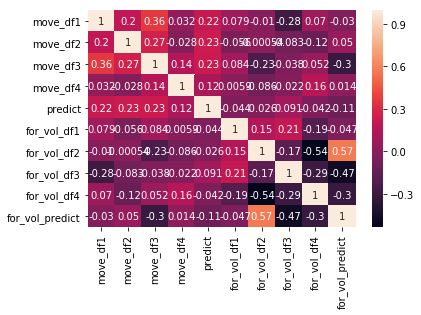

In [14]:
corrMatrix = last_forward_test.corr()
sn.heatmap(corrMatrix, annot=True)

In [15]:
x = last_forward_test[['for_vol_df1','for_vol_df2', 'for_vol_df3', 'for_vol_df4']].values
y = last_forward_test['for_vol_predict'].values

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

new_model = LinearRegression()
new_model.fit(x_poly, y)
y_poly_pred = new_model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)


0.000139898873275179
0.9109339324034276


In [18]:
X = last_forward_test[['for_vol_df1','for_vol_df2', 'for_vol_df3', 'for_vol_df4']].values
y = last_forward_test['for_vol_predict'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', regressor.score(X_test, y_test))

Mean Absolute Error: 0.0002726908759903813
Mean Squared Error: 1.1382563328547674e-07
Root Mean Squared Error: 0.0003373805466909388
R2: 0.5289987974491323


In [19]:
last_row = last_forward_test.tail(1)

In [20]:
test_input = last_row[['for_vol_df1','for_vol_df2', 'for_vol_df3', 'for_vol_df4']].values
test_input

array([[0.00322496, 0.00268938, 0.00401701, 0.00587369]])

In [21]:
regressor.predict(test_input)

array([0.00327663])

In [24]:
new_model.predict(test_input)

ValueError: shapes (1,4) and (35,) not aligned: 4 (dim 1) != 35 (dim 0)